In [1]:
# Copyright Tay Zhi Cong, year 2025

import random
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
import math
import sys
np.set_printoptions(threshold=sys.maxsize)


#### Design a low-pass half-band filter with the following spec:
transition bandwidth: 0.1 \
stop-band attenuation: 60dB

In [2]:
stop_band_attenuation = 60
f_sampling = 1
f_transition = 0.1
f_minus_6db = 0.25

beta = signal.kaiser_beta(stop_band_attenuation) # 1. calculate the kaiser beta
filter_length = math.ceil((f_sampling/f_transition) * (stop_band_attenuation-8)/14) # 2. estimate the filter length : N ~= f_sampling/ f_transition * (Attenuation (in dB) - 8) / 14
print("beta is", beta)
print("filter_length is", filter_length)

filter_length = 41

h = signal.remez(20, [0, (0.25-0.05)*2, 0.5, 0.5], [1, 0], weight=[1, 1])
h_complete = np.zeros(41)
h_complete[1::2] = 0.5 * h
h_complete[20] = 0.5
h = h_complete
print(h)
print("sum of h is", sum(h))
# not needed
# h = h/sum(h)


beta is 5.65326
filter_length is 38
[ 0.         -0.00063849  0.          0.0016307   0.         -0.00354979
  0.          0.00677361  0.         -0.01188263  0.          0.01978161
  0.         -0.0322049   0.          0.05351152  0.         -0.09972503
  0.          0.31613378  0.5         0.31613378  0.         -0.09972503
  0.          0.05351152  0.         -0.0322049   0.          0.01978161
  0.         -0.01188263  0.          0.00677361  0.         -0.00354979
  0.          0.0016307   0.         -0.00063849  0.        ]
sum of h is 0.9996607720165402


#### stem the impulse response, plot the magnitude spectrum and then the log magnitude spectrum

(-80.0, -50.0)

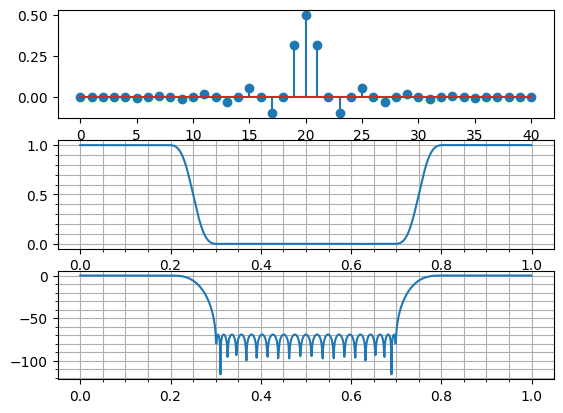

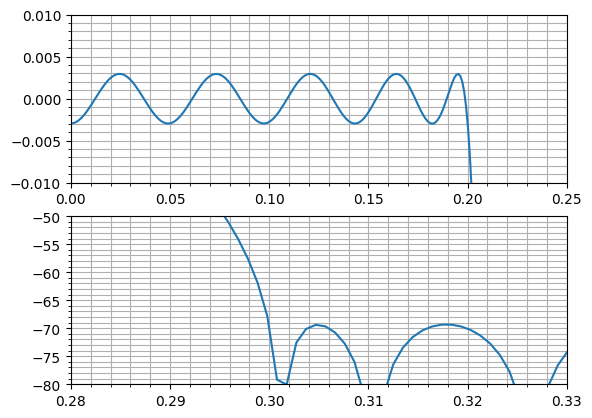

In [3]:
ax1 = plt.subplot(3,1,1)
ax1.stem(h)
ff = np.arange(0, 1, 1/1024) * 1
ax2 = plt.subplot(3,1,2)
ax2.plot(ff, abs(np.fft.fft(h, 1024)))
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")
ax2 = plt.subplot(3,1,3)
ax2.plot(ff, 20*np.log10(abs(np.fft.fft(h, 1024))))
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")

plt.figure()
ax3 = plt.subplot(2,1,1)
ax3.plot(ff, 20*np.log10(abs(np.fft.fft(h, 1024))))
ax3.grid(True)
ax3.minorticks_on()
ax3.grid(which="minor")
ax3.set_xlim(0, 0.25)
ax3.set_ylim(-0.01, 0.01)

ax4 = plt.subplot(2,1,2)
ax4.plot(ff, 20*np.log10(abs(np.fft.fft(h, 1024))))
ax4.grid(True)
ax4.minorticks_on()
ax4.grid(which="minor")
ax4.set_xlim(0.28, 0.33)
ax4.set_ylim(-80, -50)

In [13]:
print("h shape is", h.shape)

def generate_complex_sinusoid(number_of_samples):
    n = np.arange(0, number_of_samples, 1)
    complex_sinusoid = np.exp(1j/2*np.pi*n) # 2*pi*f*t = 2*pi/N*k*n = 2*pi/4*1*n because want to shift to quarter sample rate
    return complex_sinusoid

h = h * generate_complex_sinusoid(41)

h shape is (41,)


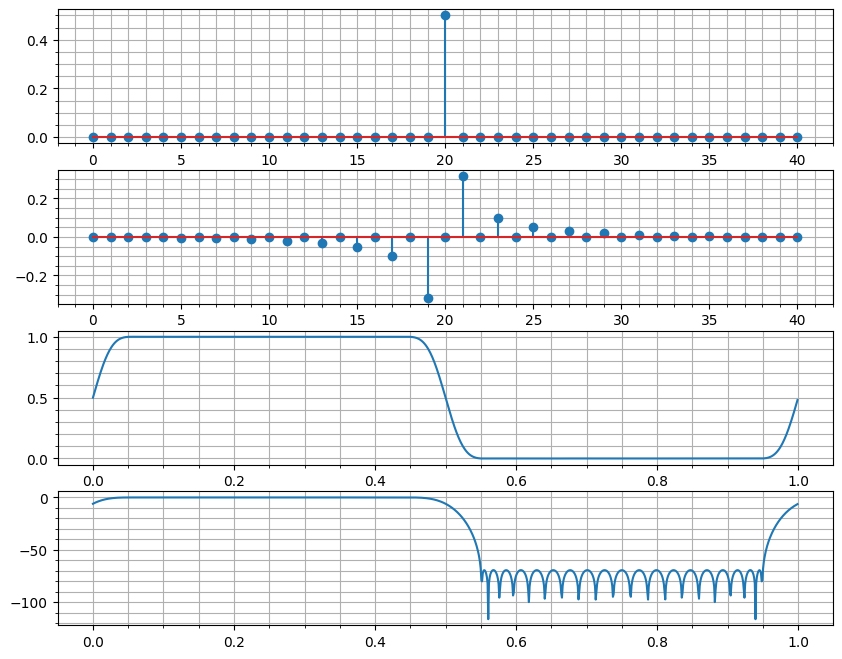

In [22]:
plt.figure(figsize=(10,8))
ax1 = plt.subplot(4,1,1)
ax1.stem(np.real(h))
ax1.grid(True)
ax1.minorticks_on()
ax1.grid(which="minor")
ax2 = plt.subplot(4,1,2)
ax2.stem(np.imag(h))
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")
ff = np.arange(0, 1, 1/1024) * 1
ax3 = plt.subplot(4,1,3)
ax3.plot(ff, abs(np.fft.fft(h, 1024)))
ax3.grid(True)
ax3.minorticks_on()
ax3.grid(which="minor")
ax4 = plt.subplot(4,1,4)
ax4.plot(ff, 20*np.log10(abs(np.fft.fft(h, 1024))))
ax4.grid(True)
ax4.minorticks_on()
ax4.grid(which="minor")
